In [2]:
import os, shutil
original_dataset_dir = 'dogs-vs-cats/train'
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

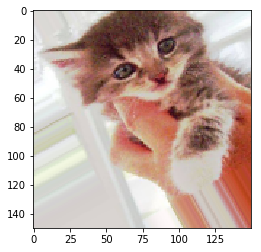

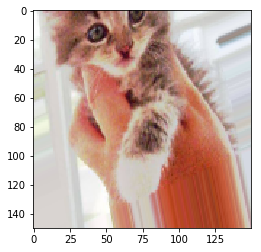

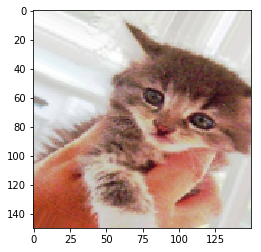

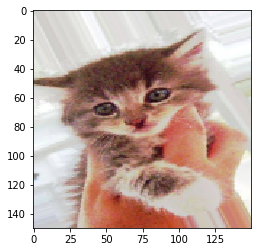

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [18]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 104s 1s/step - loss: 0.6704 - acc: 0.5875 - val_loss: 0.6571 - val_acc: 0.6070
Epoch 2/100
100/100 [==============================] - 97s 967ms/step - loss: 0.6592 - acc: 0.5945 - val_loss: 0.6426 - val_acc: 0.5980
Epoch 3/100
100/100 [==============================] - 86s 863ms/step - loss: 0.6518 - acc: 0.6155 - val_loss: 0.6339 - val_acc: 0.6310
Epoch 4/100
100/100 [==============================] - 86s 860ms/step - loss: 0.6296 - acc: 0.6405 - val_loss: 0.6243 - val_acc: 0.6130
Epoch 5/100
100/100 [==============================] - 89s 886ms/step - loss: 0.6126 - acc: 0.6600 - val_loss: 0.6426 - val_acc: 0.6380
Epoch 6/100
100/100 [==============================] - 86s 859ms/step - loss: 0.6069 - acc: 0.6610 - val_loss: 0.6542 - val_acc: 0.6050
Epoch 7/100
100/100 [==============================] - 89s 889ms/step - loss: 0.5968 - acc: 0

100/100 [==============================] - 87s 871ms/step - loss: 0.4437 - acc: 0.7875 - val_loss: 0.4307 - val_acc: 0.8030
Epoch 60/100
100/100 [==============================] - 87s 874ms/step - loss: 0.4461 - acc: 0.7945 - val_loss: 0.4550 - val_acc: 0.7870
Epoch 61/100
100/100 [==============================] - 86s 864ms/step - loss: 0.4435 - acc: 0.7885 - val_loss: 0.4852 - val_acc: 0.7810
Epoch 62/100
100/100 [==============================] - 86s 856ms/step - loss: 0.4425 - acc: 0.7915 - val_loss: 0.4383 - val_acc: 0.7920
Epoch 63/100
100/100 [==============================] - 87s 872ms/step - loss: 0.4353 - acc: 0.8055 - val_loss: 0.4598 - val_acc: 0.8000
Epoch 64/100
100/100 [==============================] - 86s 857ms/step - loss: 0.4234 - acc: 0.8050 - val_loss: 0.5135 - val_acc: 0.7770
Epoch 65/100
100/100 [==============================] - 87s 867ms/step - loss: 0.4429 - acc: 0.7945 - val_loss: 0.4523 - val_acc: 0.7790
Epoch 66/100
100/100 [==============================] 

In [20]:
model.save('cats_and_dogs_small_2.h5')

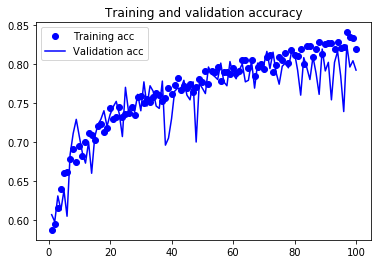

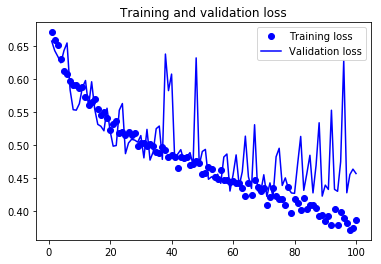

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()